# Introduction to [`pandas`](http://pandas.pydata.org/) and statistical analysis with Python

`pandas` is part of the constantly growing scientific environment of python. We have already learnt the basics of python, jupyter (and Ipython). `pandas` does not implement significant modeling functionality outside of linear and panel regression; for this, look to [`statsmodels`](http://statsmodels.sourceforge.net/) and [`scikit-learn`](http://scikit-learn.org/stable/). At the following class we will briefly introduce some models from `sckitlearn` and  explore some basic network analysis and visualization with [`networkx`](https://networkx.github.io/). 


<div class="frontmatter text-center">
<img src="scientific_python.jpg" width="800px"/>
</div>

`pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R. Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate. 

For us the main advantages:


- fast and efficient DataFrame object for data manipulation with integrated indexing;
- easy to use tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- flexible reshaping and pivoting of data sets;
- intelligent label-based slicing, fancy indexing, and subsetting of large data sets;- 
- columns can be inserted and deleted from data structures for size mutability;
- aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
- high performance merging and joining of data sets;
- hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- attractive statistical graphics from DataFrames with [seaborn](https://stanford.edu/~mwaskom/software/seaborn/)

## So let's get started

Firs we need to learn what is `numpy`. The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

[A notebook](http://ipython.org/notebook.html) and a detailed lecture about `numpy` is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

In this class we do not get deep in `numpy`, but it is important to know that `pandas` is built on `numpy`, so even if we do not notice we will use its functionailites which knowledge can be very useful later (big data analytics, parallel computing).

To start pandas by default we import the following packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


### Data structures

In [3]:
#Series
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [4]:
#Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
dates, type(dates)

(DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'),
 pandas.core.indexes.datetimes.DatetimeIndex)

In [5]:
#DataFrame is the perfect structure for social scientist raised by SPSS, stata and R
#We can see what it is in our dataset \o/
# It does a lot of handy tricks, which makes data preparation easier
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.666004,1.032786,-0.870688,-2.487588
2013-01-02,-0.421455,-0.242302,1.737198,1.461526
2013-01-03,-1.197552,-0.221233,1.295798,-0.191456
2013-01-04,0.896517,0.803410,0.212274,0.207822
2013-01-05,-0.212884,0.930468,0.050313,0.368827
2013-01-06,1.976955,-0.866276,0.361560,1.407509


In [6]:
#It works with many different datatypes
#Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
#We can check what kind of data types we have
print (df2.dtypes)
print ('\n')
#For  given column as well
print ('type of column A: ')
print(str(df2.A.dtypes))

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


type of column A: 
float64


If you type df2. and push `<TAB>` jupyter shows you all the possibilities what you can do with your dataframe. Try it! DO you remember how to look for help?


In [10]:
df2.copy?

In [11]:
#See the top & bottom rows of the frame
df.head()

,A,B,C,D
2013-01-01,1.666004,1.032786,-0.870688,-2.487588
2013-01-02,-0.421455,-0.242302,1.737198,1.461526
2013-01-03,-1.197552,-0.221233,1.295798,-0.191456
2013-01-04,0.896517,0.803410,0.212274,0.207822
2013-01-05,-0.212884,0.930468,0.050313,0.368827


In [12]:
df.tail()

,A,B,C,D
2013-01-02,-0.421455,-0.242302,1.737198,1.461526
2013-01-03,-1.197552,-0.221233,1.295798,-0.191456
2013-01-04,0.896517,0.803410,0.212274,0.207822
2013-01-05,-0.212884,0.930468,0.050313,0.368827
2013-01-06,1.976955,-0.866276,0.361560,1.407509


In [13]:
df.index, df.columns, df.values

(DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index(['A', 'B', 'C', 'D'], dtype='object'),
 array([[ 1.66600418,  1.03278625, -0.87068843, -2.48758815],
        [-0.42145527, -0.24230169,  1.73719828,  1.46152564],
        [-1.1975515 , -0.22123314,  1.29579825, -0.19145551],
        [ 0.89651703,  0.80341013,  0.21227379,  0.20782239],
        [-0.21288355,  0.93046754,  0.05031305,  0.36882673],
        [ 1.9769552 , -0.8662763 ,  0.3615602 ,  1.40750888]]))

In [14]:
#Very usefull function to see what it is in our dataset:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.451264,0.239475,0.464409,0.127773
std,1.258801,0.786369,0.931591,1.443825
min,-1.197552,-0.866276,-0.870688,-2.487588
25%,-0.369312,-0.237035,0.090803,-0.091636
50%,0.341817,0.291088,0.286917,0.288325
75%,1.473632,0.898703,1.062239,1.147838
max,1.976955,1.032786,1.737198,1.461526


In [15]:
#Transpose
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.666004,-0.421455,-1.197552,0.896517,-0.212884,1.976955
B,1.032786,-0.242302,-0.221233,0.803410,0.930468,-0.866276
C,-0.870688,1.737198,1.295798,0.212274,0.050313,0.361560
D,-2.487588,1.461526,-0.191456,0.207822,0.368827,1.407509


In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-2.487588,-0.870688,1.032786,1.666004
2013-01-02,1.461526,1.737198,-0.242302,-0.421455
2013-01-03,-0.191456,1.295798,-0.221233,-1.197552
2013-01-04,0.207822,0.212274,0.803410,0.896517
2013-01-05,0.368827,0.050313,0.930468,-0.212884
2013-01-06,1.407509,0.361560,-0.866276,1.976955


### Great we had  a look at the very basics of DataFrames and pandas. Now we should explore it deeper with real data.

## Exercise
* Read the two JSON files from your library (clinton, trump)
* Use the find_mentioned_users function to parse the users Trump/Clinton mentioned in their tweets during the last presidential elections.
* Use Count how many times a user was mentioned by each candidate
* Create a dataframe where indexes are the mentioned users and there are two more columns: mentions_by_clinton, mentions_by_trump
* Plot the frequencies of user mentions by candidate, and also those who have been mentioned by both candidates

In [17]:
import json
json1_file = open('clinton_tweets.txt')
json1_str = json1_file.read()
json1_data = json.loads(json1_str)

In [18]:
json1_data[0].keys()

dict_keys(['contributors', 'truncated', 'text', 'is_quote_status', 'in_reply_to_status_id', 'id', 'favorite_count', 'entities', 'retweeted', 'coordinates', 'source', 'in_reply_to_screen_name', 'in_reply_to_user_id', 'retweet_count', 'id_str', 'favorited', 'retweeted_status', 'user', 'geo', 'in_reply_to_user_id_str', 'possibly_sensitive', 'lang', 'created_at', 'in_reply_to_status_id_str', 'place', 'metadata'])

In [26]:
def find_mentioned_users(data):
    screen_names=[user_mention['screen_name'] 
                 for status in data
                     for user_mention in status['entities']['user_mentions'] ]
    return screen_names

In [27]:
find_mentioned_users(json1_data)

['nuiotwo',
 'YouTube',
 'DebAlwaystrump',
 'realDonaldTrump',
 'nuiotwo',
 'LindaSuhler',
 'vonzion',
 'CNN',
 'bfraser747',
 'davidbrockdc',
 'RogerJStoneJr',
 'JudicialWatch',
 'FBI',
 'StateDept',
 'wikileaks',
 'LastWave2014',
 'zesty_politics',
 'AmyMek',
 'mashable',
 'c0nvey',
 'IBDeditorials',
 '2ALAW',
 'maggotmagnet',
 'SnakePlisskn',
 'DebiDkruse',
 'DennisPrager',
 'MrVeritas',
 'cnni',
 'hugoengel4',
 'SheriffClarke',
 'ASerignese',
 'MailOnline',
 'CNN',
 'DebAlwaystrump',
 'JudicialWatch',
 'FBI',
 'StateDept',
 'CNN',
 'SheriHerman10',
 'Cernovich',
 'DrJillStein',
 'ThankYouBernie',
 'mterr337',
 'AliceOllstein',
 'USAforTrump2016',
 'Lagartija_Nix',
 'CNN',
 'mterr337',
 'AliceOllstein',
 'CulturalCombat',
 'AnneBayefsky',
 'nuiotwo',
 'HillaryClinton',
 'sweetatertot2',
 'Sarah__Reynolds',
 'dcexaminer',
 'Trumpaholic',
 'TrumpRoyalty',
 'LindaSuhler',
 'LAYNALANGUAGE',
 'YouTube',
 'GovMikeHuckabee',
 'CNNPolitics',
 'PressForTruth',
 'aguywithnolife',
 'JoshNoneYa

In [28]:
from collections import Counter

In [29]:
d=dict(Counter(find_mentioned_users(json1_data)))

In [30]:
Clinton=pd.DataFrame.from_dict(d, orient='index')

In [32]:
Clinton.head()

,0
nuiotwo,160
YouTube,64
DebAlwaystrump,64
realDonaldTrump,64
LindaSuhler,96


In [33]:
Clinton.columns=['clinton']

In [34]:
Clinton.head()

,clinton
nuiotwo,160
YouTube,64
DebAlwaystrump,64
realDonaldTrump,64
LindaSuhler,96


In [35]:
# Let's make a function out of it!

In [36]:
def user_mentions_df(file):
    json1_file = open(file)
    json1_str = json1_file.read()
    json1_data = json.loads(json1_str)
    d=dict(Counter(find_mentioned_users(json1_data)))
    return pd.DataFrame.from_dict(d, orient='index')

In [37]:
Trump=user_mentions_df('trump_tweets.txt')

In [38]:
Trump.columns=['trump']

In [39]:
Trump.head()

,trump
FoxNews,32
SpecialKMB1969,32
Lagartija_Nix,32
LifeZette,32
2ser,32


### Let's join them! Check out [this](http://pandas.pydata.org/pandas-docs/stable/merging.html)!

In [40]:
mentioned_users=pd.concat([Trump, Clinton], axis=1)

/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [41]:
mentioned_users['both']=mentioned_users.trump+mentioned_users.clinton

In [42]:
mentioned_users

,trump,clinton,both
2ALAW,NaN,32.0,NaN
2ser,32.0,NaN,NaN
AP,NaN,32.0,NaN
ASerignese,NaN,32.0,NaN
ATLBlackStar,32.0,NaN,NaN
AlanKestrel750,32.0,NaN,NaN
AliceOllstein,NaN,64.0,NaN
AlterNet,32.0,NaN,NaN
AlysiaStern,32.0,NaN,NaN
AmyMek,NaN,32.0,NaN


In [50]:
#to have pretty plots install seaborn and import it
import seaborn as sns

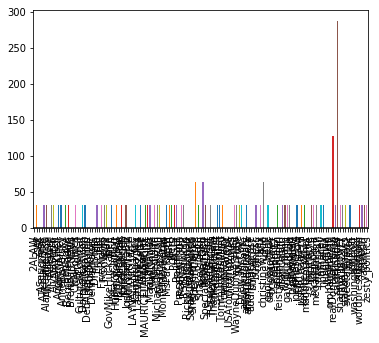

In [44]:
plt.figure()
mentioned_users.trump.plot(kind='bar')
plt.axhline(0, color='k')

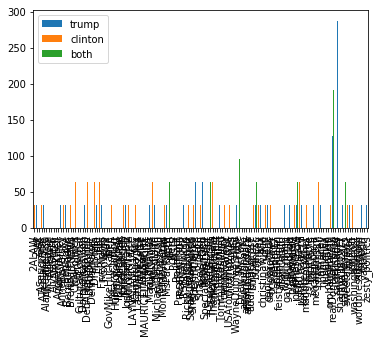

In [45]:
mentioned_users.plot.bar()

## Too much data doesn't make any sense, we should sort it and lot only the relevant ones

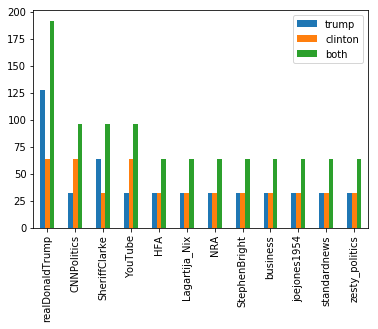

In [49]:
mentioned_users.sort_values(by=['both'], ascending=False)[:12].plot.bar()

# DATA ANALYSIS


In sociology and social sciences we have a crazy amount of `sav` files by IBM Statistics, `stata` and `R` dataframes. R mainly handles csv-s well, but with `rpy2` module Python and R can communicate easily. 
Pandas handles many file formats, including `csv`, `json`, `sql` and `stata`, but not `sav`.

        read_csv
        read_excel
        read_hdf
        read_sql
        read_json
        read_msgpack (experimental)
        read_html
        read_gbq (experimental)
        read_stata
        read_sas
        read_clipboard
        read_pickle


In [79]:
ESS=pd.read_stata('ESS9e01_1.dta', convert_dates=False, convert_categoricals=False, 
                  encoding=None, index_col=None, convert_missing=False, 
                  preserve_dtypes=True, columns=None, order_categoricals=False, chunksize=None, iterator=False)

In [94]:
list(ESS.columns)

['name',
 'essround',
 'edition',
 'proddate',
 'idno',
 'cntry',
 'nwspol',
 'netusoft',
 'netustm',
 'ppltrst',
 'pplfair',
 'pplhlp',
 'polintr',
 'psppsgva',
 'actrolga',
 'psppipla',
 'cptppola',
 'trstprl',
 'trstlgl',
 'trstplc',
 'trstplt',
 'trstprt',
 'trstep',
 'trstun',
 'vote',
 'prtvtcat',
 'prtvtdbe',
 'prtvtdbg',
 'prtvtgch',
 'prtvtbcy',
 'prtvtecz',
 'prtvede1',
 'prtvede2',
 'prtvtgee',
 'prtvtdfi',
 'prtvtdfr',
 'prtvtcgb',
 'prtvtfhu',
 'prtvtcie',
 'prtvtcit',
 'prtvtgnl',
 'prtvtbno',
 'prtvtdpl',
 'prtvtrs',
 'prtvtfsi',
 'contplt',
 'wrkprty',
 'wrkorg',
 'badge',
 'sgnptit',
 'pbldmn',
 'bctprd',
 'pstplonl',
 'clsprty',
 'prtcldat',
 'prtcldbe',
 'prtcldbg',
 'prtclgch',
 'prtclbcy',
 'prtclecz',
 'prtclede',
 'prtclgee',
 'prtclefi',
 'prtclffr',
 'prtclcgb',
 'prtclghu',
 'prtcleie',
 'prtcldit',
 'prtclfnl',
 'prtclbno',
 'prtclhpl',
 'prtclrs',
 'prtclfsi',
 'prtdgcl',
 'lrscale',
 'stflife',
 'stfeco',
 'stfgov',
 'stfdem',
 'stfedu',
 'stfhlth',
 'gincd

In [98]:
ESS[['imsmetn', "imdfetn", 'impcntr', 'imbgeco', 'imueclt', 'imwbcnt', 'happy']].head() 

,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy
0,2.0,2.0,2.0,5.0,6.0,0.0,7.0
1,2.0,3.0,3.0,6.0,5.0,5.0,8.0
2,2.0,2.0,3.0,5.0,6.0,6.0,10.0
3,4.0,4.0,4.0,2.0,1.0,2.0,7.0
4,2.0,3.0,3.0,5.0,4.0,5.0,8.0


## Group Exercise (30 mins)

Time for data exploration before we start data analysis in groups. Each group has 30 minutes to create one plot and present their workflow and results in front of the class in 5 minutes, including the code (emphasizing new functions of pandas they explored)

See survey: https://www.europeansocialsurvey.org/docs/round9/fieldwork/source/ESS9_source_questionnaires.pdf

See variable names: https://www.europeansocialsurvey.org/docs/round9/survey/ESS9_data_protocol_e01_4.pdf


### TOPICS

1. Political differences between countraies:
        Create a plot by countries regarding how is the left-right spectrum is in the country. 
        use: cntry, lrsscale, (extra variables: agea, gndr)

2. Voting behavior by countries:
         Create a plot, to show how many percent went to vote at the last elections by countries.
         use: cntry, vote, gndr, agea

3. Trust in a country of choice:
        Compare a certain country by gender,age and the size of residence (regunit) regarding how much they trust people.
        use: ppltrst, pplfair, pplhlp, agea, gndr, regunit/cntry

4. Attutdes towards migrants in Hungary, Germany and a country of yur choice:
        Compare on a plot, how xenofobic these three countries in total and by questions
        use:('imsmetn', "imdfetn", 'impcntr', 'imbgeco', 'imueclt', 'imwbcnt'), 
        ExtraL see how happyness 'happy' relates to xenofobia (Hint: sns.regplot)

### Instructions:
* In order to present results, create new cathegorical (ordinal) variables if needed (eg.: age groups, left/right..etc)
* Don't forget the descriptive statistics!
* Use your social science and statistical knowledge, be creative and add other variables if you want.
* Each plot must have title, labels (x,y), legend (Check out my matplotlib intro jupyter notebook)
* Think about which plot is the best to show the results (histogram, bar, line...etc)
* Before plotting, check out the descriptive statistics (hint: NaN~np.nan, outliers)
* Present your work in front of the class in a well-designed Jupyter Notebook, explain your workflow choice of visualization and analysis.

Use Google/Stackoverflow or ask me if you have any question!